**Add pre-installed package path & load packages:**

In [1]:
.libPaths(c(.libPaths(), "/exports/eddie3_apps_local/apps/SL7/R/4.3.0/lib64/R/library"))

In [2]:
library(scales)
library(ggpubr)
library("dplyr", warn.conflicts = F)
library("tidyverse", warn.conflicts = F, quietly = T)
library("stringr", warn.conflicts = F)
library("data.table", warn.conflicts = F) 
library("vroom", warn.conflicts = F)
library("ggplot2", warn.conflicts = F)
library(corrplot, warn.conflicts = F)
library(pROC, warn.conflicts = F)
library(yardstick, warn.conflicts = F)
library(glmnet)

Loading required package: ggplot2

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded

Type 'citation("pROC")' for a citation.

Loading required package: Matrix


Attaching package: ‘Matrix’


The follow

In [3]:
packageVersion("yardstick")

[1] ‘1.3.0’

**Change working directory:**

In [3]:
wd = "/exports/cmvm/eddie/smgphs/groups/Quantgen/Users/vasilis/PHD/proteomics/delirium/lasso/data_lasso_cv/"
setwd(wd)
getwd()

[1] "/exports/cmvm/eddie/smgphs/groups/Quantgen/Users/vasilis/PHD/proteomics/delirium/lasso/data_lasso_cv"

**Load data:**

In [4]:
cv=1

In [5]:
# stabsel results 
file <- paste0("stabsel_data/nodem/lasso_stabsel_df_1on1_cv", cv, ".csv")
stabsel <- fread(file)

In [6]:
## training dataset
# cv1
train_file1 <- paste0("cv_sets/nodem/training_data_for_cv", cv, ".csv")
train_data_orig <- fread(train_file1)
## test dataset
# cv1
test_file1 <- paste0("cv_sets/nodem/test_data_for_cv", cv, ".csv")
test_data_orig <- fread(test_file1)

In [7]:
# from "cv.lasso.log.orig.for.stabsel.rds"
cv.lasso1 <- readRDS(paste0("lasso.cv.glmnet.data/nodem/cv.lasso.log.orig.for.cv", cv, ".rds"))
cv.lasso1$lambda.min
cv.lasso1$lambda.1se

[1] 0.03015309

[1] 0.05783091

In [8]:
head(stabsel)

sex,age_at_collection,BMI,A1BG,AAMDC,AARSD1,ABCA2,ABHD14B,ABL1,ABO,⋯,ZHX2,ZNF174,ZNF75D,ZNF830,ZNRD2,ZNRF4,ZP3,ZP4,ZPR1,lambda
<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,⋯,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,1,1,0.02,0.01,0,0,0,0,0.1,⋯,0,0,0,0.03,0,0.01,0.01,0,0.03,0.03015309
1,1,1,0.00,0.00,0,0,0,0,0.0,⋯,0,0,0,0.00,0,0.00,0.00,0,0.00,0.05783091


**View stabsel results:**

In [9]:
### view stabsel results
## stabsel results at lambda.min level
#lambda_min_idx <- which(cv.lasso1$lambda==cv.lasso1$lambda.min)
lambda_min_idx <- which(round(stabsel$lambda,5) ==  round(cv.lasso1$lambda.min,5))
stabsel_min <- 
stabsel[lambda_min_idx,] %>% 
  pivot_longer(cols=colnames(.)) %>% 
  filter(!(name %in% c("age_at_collection","sex","BMI", "lambda"))) %>% 
  arrange(desc(value)) 
# get stabsel selected proteins (freq>=0.5)
prots.min <- stabsel_min %>% filter(value>=0.5) %>% pull(name)
cat(paste0("Proteins selected at lambda.min ", "(n=", length(prots.min), "):\n\n", paste0(prots.min, collapse = " ")))
cat("\n\n\n")

## stabsel results at lambda.1se level
#lambda_1se_idx <- which(stabsel$lambda==cv.lasso1$lambda.1se)
lambda_1se_idx <- which(round(stabsel$lambda,5) ==  round(cv.lasso1$lambda.1se,5))
stabsel_1se <- 
stabsel[lambda_1se_idx,] %>% 
  pivot_longer(cols=colnames(.)) %>% 
  filter(!(name %in% c("age_at_collection","sex","BMI", "lambda"))) %>% 
  arrange(desc(value)) 
# get stabsel selected proteins (freq >= 0.5)
prots.1se <- stabsel_1se %>% filter(value>=0.5) %>% pull(name)
cat(paste0("Proteins selected at lambda.1se ", "(n=", length(prots.1se), "):\n\n", paste0(prots.1se, collapse = " ")))


Proteins selected at lambda.min (n=9):

CLEC3B MSLN SELENOP TNFSF12 AREG TSHB TYRP1 SCGB1A1 C7


Proteins selected at lambda.1se (n=2):

AREG MSLN

**Compare with non-stratified stabsel proteins:**

In [10]:
stabsel_1se.full <- fread('../outputs_for_paper/stabsel_1se_freqs.csv', drop = 1)
stabsel_1se.both <- left_join(stabsel_1se.full, stabsel_1se,  by='name' , suffix = c('_full', '_nodem'))
stabsel_1se.both %>% filter(value_full >=0.5)

name,value_full,value_nodem
<chr>,<dbl>,<dbl>
GFAP,0.86,0.00
CLEC3B,0.81,0.45
C7,0.78,0.18
AREG,0.76,0.63
LYSMD3,0.72,0.07
CEND1,0.71,0.00
MEPE,0.69,0.00
TSHB,0.67,0.10
LRG1,0.65,0.28


In [11]:
# for lambda.1se
print(paste("Number of proteins with freq=0 at the lambda.1se level:", nrow(stabsel_1se[stabsel_1se$value==0,])))
print(paste("Number of proteins with freq>0 at the lambda.1se level:", nrow(stabsel_1se[stabsel_1se$value>=0.01,])))

#stabsel_1se %>% filter(value>0) %>% pull(value) %>% as.factor %>% summary 


[1] "Number of proteins with freq=0 at the lambda.1se level: 2716"
[1] "Number of proteins with freq>0 at the lambda.1se level: 203"


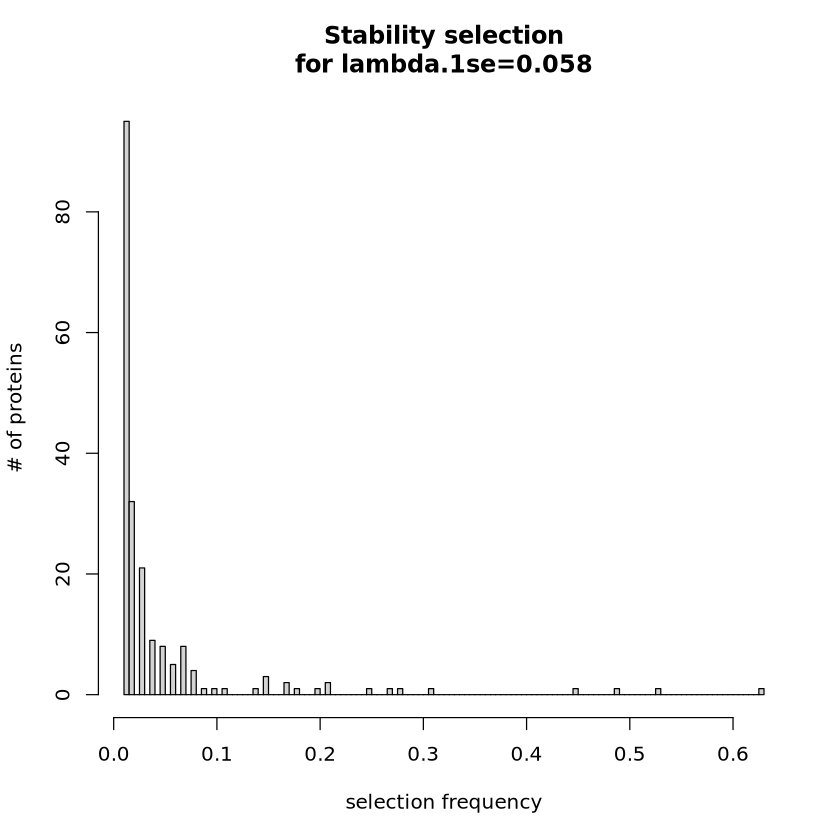

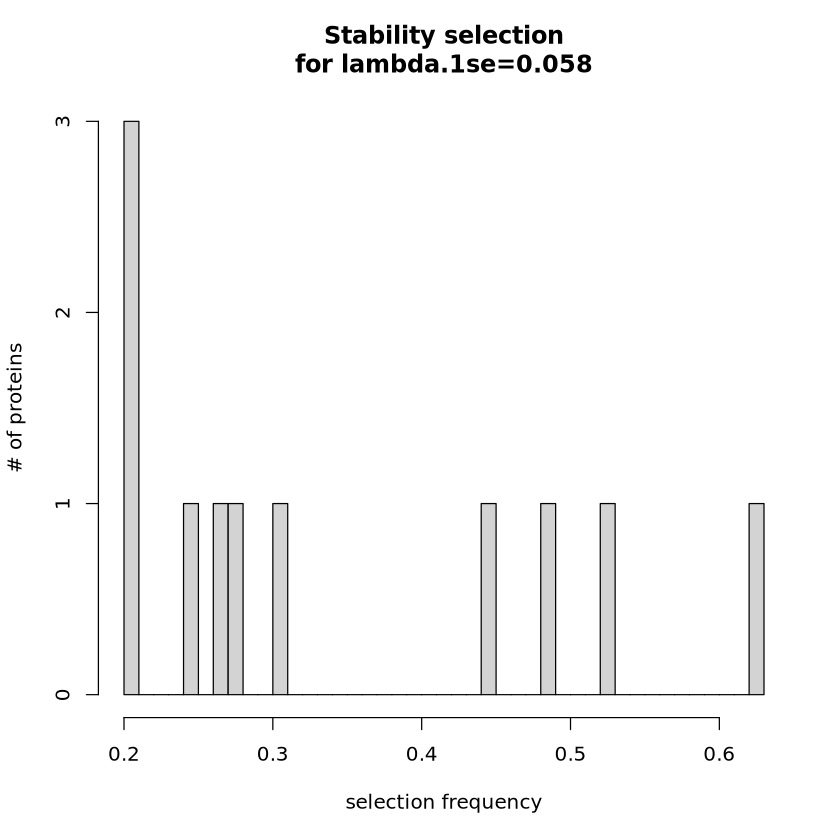

In [12]:
# for lambda.1se
# histogram for freq > 0
stabsel_1se %>% 
    filter(value>0) %>% pull(value) %>% 
    hist(.,breaks = 100, 
         main= paste0("Stability selection\nfor lambda.1se=", round(cv.lasso1$lambda.1se,3)),
         ylab= "# of proteins",
         xlab= "selection frequency")

# histogram for freq >=0.5
stabsel_1se %>% 
    filter(value>=0.2) %>% pull(value) %>% 
    hist(.,breaks = 50, 
         main= paste0("Stability selection\nfor lambda.1se=", round(cv.lasso1$lambda.1se,3)),
         ylab= "# of proteins",
         xlab= "selection frequency")

In [13]:
# export
write.csv(stabsel_1se, "../outputs_for_paper/nodem/stabsel_1se_freqs.csv")

In [78]:
#stabsel_1se %>% filter(value>=0.2)

**LASSO on training set:**

In [79]:
# overlap with total lasso selected - all overlap
prots <- fread("../lasso.names")
prots <- prots$x[-c(1,2,3,4)]

Warning message in fread("../lasso.names"):
“Detected 1 column names but the data has 2 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


In [80]:
intersect(prots.1se, prots) %>% length
setdiff(prots.1se, prots) %>% length
setdiff(prots, prots.1se) %>% length

[1] 2

[1] 0

[1] 32

In [81]:
lasso.1se <- readRDS("lasso.cv.glmnet.data/nodem/1se.lasso.log.orig.for.cv1.rds")
#lasso.1se$beta

**Number of proteins selected (freq>0.5) across lambdas:**

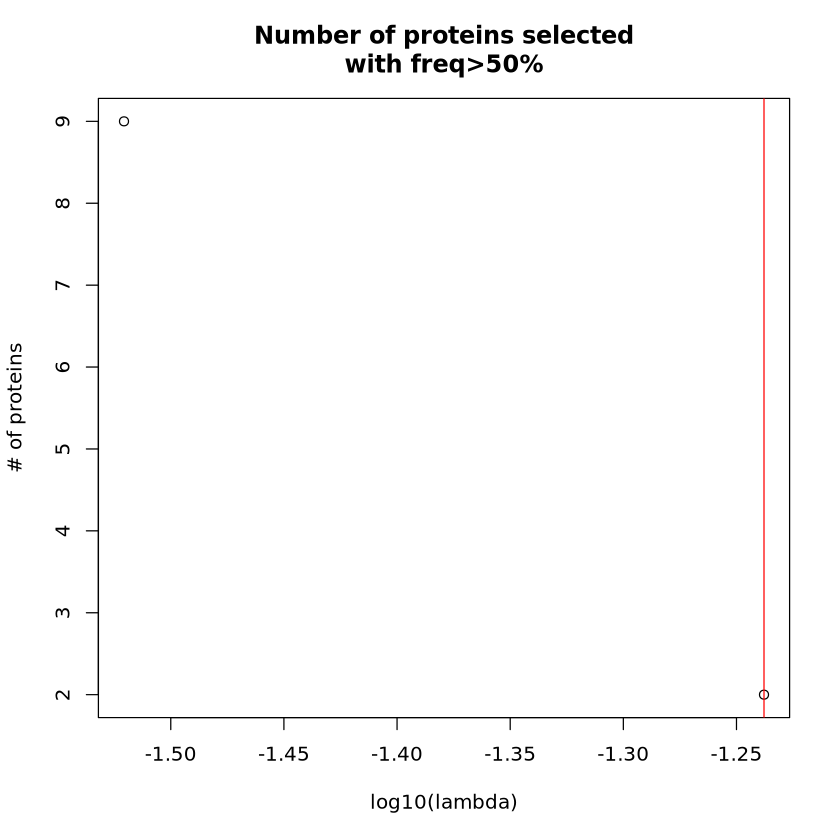

In [14]:
non_prots <- c("sex","age_at_collection","BMI","lambda")
num_selected <- stabsel %>% rowwise() %>% mutate(nonzero = sum(c_across(!all_of(non_prots))>=0.5)) %>% select(lambda,nonzero)
plot(x=log10(num_selected$lambda), y=num_selected$nonzero,
     ylab="# of proteins", 
     xlab="log10(lambda)",
     main="Number of proteins selected\nwith freq>50%")
abline(v=log10(num_selected$lambda[lambda_1se_idx]), col=c("red"))
abline(h=19, col=c("grey"), lty="dotted")


**Per-protein selection frequency across lambdas:**

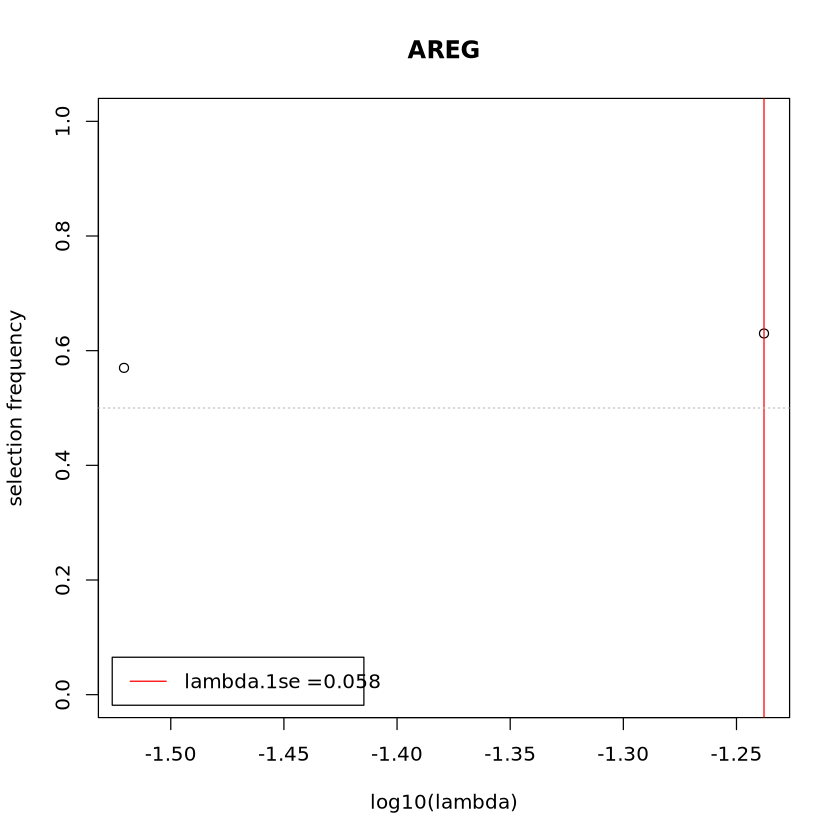

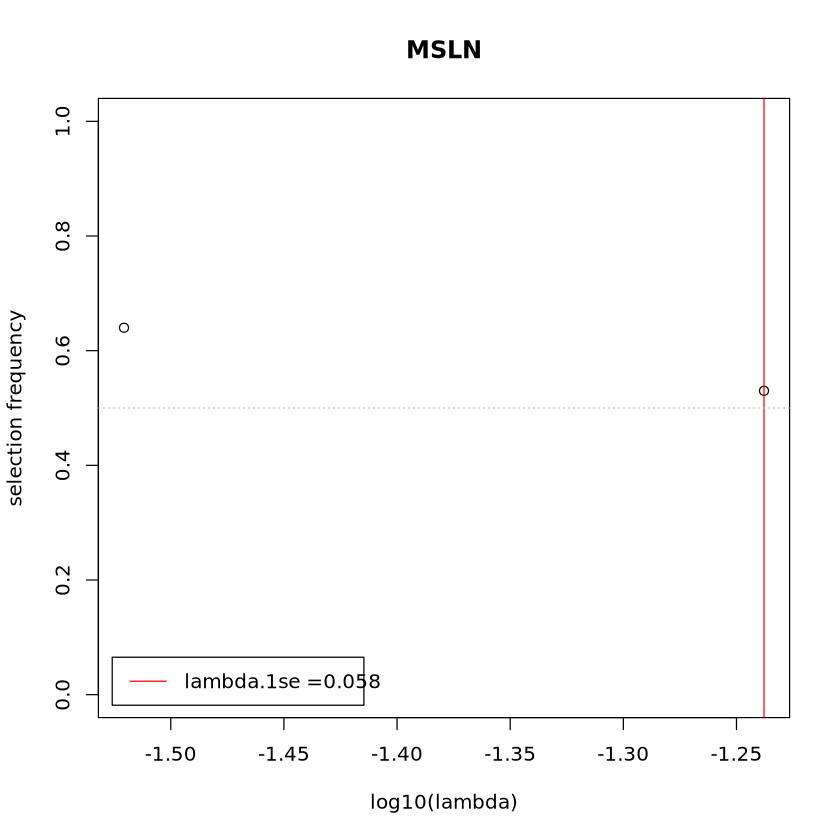

In [15]:
# for proteins selected at lambda.1se level
for (prot in prots.1se){
    log10lambda <- log10(stabsel$lambda)
    prot_freq   <- stabsel %>% pull(prot)
    legend <- paste0("lambda.1se =", round(stabsel$lambda[lambda_1se_idx],3))
    plot(x=log10lambda, y=prot_freq,
         ylim=c(0,1),
         ylab="selection frequency", 
         xlab="log10(lambda)",
         main=paste0(prot)) %>% 
    abline(v=c(log10lambda[lambda_1se_idx]), col=c("red")) %>%
    abline(h=c(0.5), lty="dotted", col=c("grey"))
    legend("bottomleft", inset=.02, legend = legend, col=c("red"), lty="solid")
}

In [16]:
# prots.1se <- stabsel_1se %>% filter(value>=0.5) %>% pull(name)
# prots.1se <- stabsel_min %>% filter(value>=0.5) %>% pull(name)
prots.1se <- stabsel_1se.both %>% filter(value_full>=0.5) %>% pull(name)
prots.1se 

[1] "GFAP"    "CLEC3B"  "C7"      "AREG"    "LYSMD3"  "CEND1"   "MEPE"    "TSHB"    "LRG1"    "SELENOP" "BCAN"    "NEFL"    "TYRP1"   "NAMPT"   "MSLN"    "BTLA"    "FGL1"    "HAVCR1"  "LTA4H"

**Add *APOE*-e4 status covariate:**

In [17]:
file = "/exports/cmvm/eddie/smgphs/groups/Quantgen/Users/vasilis/PHD/ukb.delirium.gwas/pheno_covar_files/ukb_wb_del_cov_phe_dem_apoe.txt"
apoe <- fread(file, select = c("IID", "e4_count"))
# add apoe + irnt proteins
train_data_orig <- left_join(train_data_orig, apoe, by="IID") %>% 
    mutate(across(all_of(prots.1se), ~ (qnorm((rank(.,na.last="keep")-0.5)/sum(!is.na(.))))))
test_data_orig  <- left_join(test_data_orig, apoe, by="IID") %>% 
    mutate(across(all_of(prots.1se), ~ (qnorm((rank(.,na.last="keep")-0.5)/sum(!is.na(.))))))

**Refit with stability selected proteins in training set:**

*basic + 1se stability selected + apoe4:*

In [18]:
cols.apoe  <- c("delirium_incident", "sex", "age_at_collection", "BMI", "e4_count", prots.1se)
train.apoe <- train_data_orig %>% select(all_of(cols.apoe))

In [19]:
# fit log.regression model with basic + stabsel selected predictors + apoe4
formula.apoe <- as.formula(paste("delirium_incident ~ sex + age_at_collection + BMI + e4_count", paste(prots.1se, collapse="+"), sep="+"))
#formula.apoe
mod.apoe <- glm(formula = formula.apoe, data = train.apoe, family = "binomial")
#summary(mod.apoe)
# export coefficients
write.csv(summary(mod.apoe)$coefficients, "../outputs_for_paper/nodem/train_full_model_plus_apoe_coefs.csv", row.names=T)

In [20]:
# select proteins with stepwise regression
mod.apoe <- glm(formula = formula.apoe, data = train.apoe, family = "binomial")
step.apoe <- step(mod.apoe, direction = "both", trace=F) # FGL1 removed 
summary(step.apoe)
# export coefficients
write.csv(summary(step.apoe)$coefficients, "../outputs_for_paper/nodem/train_full_model_plus_apoe_STEP_coefs.csv", row.names=T)


Call:
glm(formula = delirium_incident ~ sex + age_at_collection + BMI + 
    e4_count + CLEC3B + C7 + AREG + LYSMD3 + TSHB + LRG1 + SELENOP + 
    BCAN + NEFL + TYRP1 + MSLN + BTLA + HAVCR1 + LTA4H, family = "binomial", 
    data = train.apoe)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -13.39782    0.88059 -15.215  < 2e-16 ***
sex                 0.27562    0.13269   2.077 0.037789 *  
age_at_collection   0.11007    0.01259   8.745  < 2e-16 ***
BMI                 0.05426    0.01228   4.419 9.94e-06 ***
e4_count            0.23282    0.11657   1.997 0.045788 *  
CLEC3B             -0.28129    0.06831  -4.118 3.82e-05 ***
C7                  0.21538    0.06157   3.498 0.000469 ***
AREG                0.14100    0.06992   2.016 0.043751 *  
LYSMD3             -0.22615    0.06069  -3.726 0.000194 ***
TSHB               -0.16682    0.06006  -2.777 0.005479 ** 
LRG1                0.18322    0.06059   3.024 0.002497 ** 
SELENOP            -

*basic + 1se stability selected:*

In [22]:
cols.1se  <- c("delirium_incident", "sex", "age_at_collection", "BMI", prots.1se)
train.1se <- train_data_orig %>% select(all_of(cols.1se))

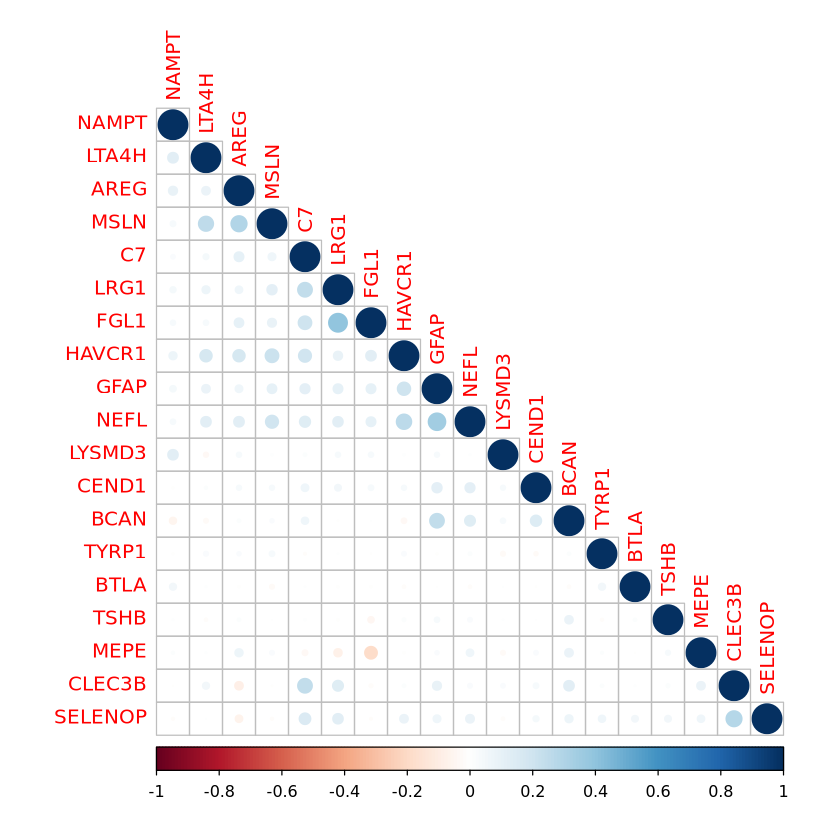

In [23]:
# correlation plot for selected proteins
corrplot(cor(train.1se[,-c(1:4)]), type="lower", order='hclust', diag=T)

In [24]:
# fit log.regression model with stabsel selected predictors
formula.1se <- as.formula(paste("delirium_incident ~ sex + age_at_collection + BMI ", paste(prots.1se, collapse="+"), sep="+"))
formula.1se
mod.1se <- glm(formula = formula.1se, data = train.1se, family = "binomial")
summary(mod.1se)
# export coefficients
write.csv(summary(mod.1se)$coefficients, "../outputs_for_paper/nodem/train_full_model_coefs.csv", row.names=T)

delirium_incident ~ sex + age_at_collection + BMI + GFAP + CLEC3B + 
    C7 + AREG + LYSMD3 + CEND1 + MEPE + TSHB + LRG1 + SELENOP + 
    BCAN + NEFL + TYRP1 + NAMPT + MSLN + BTLA + FGL1 + HAVCR1 + 
    LTA4H


Call:
glm(formula = formula.1se, family = "binomial", data = train.1se)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -13.20208    0.88560 -14.907  < 2e-16 ***
sex                 0.34376    0.14066   2.444 0.014527 *  
age_at_collection   0.10679    0.01288   8.289  < 2e-16 ***
BMI                 0.05574    0.01239   4.499 6.84e-06 ***
GFAP                0.03216    0.06805   0.473 0.636440    
CLEC3B             -0.26703    0.06930  -3.853 0.000117 ***
C7                  0.20209    0.06226   3.246 0.001171 ** 
AREG                0.13298    0.07039   1.889 0.058878 .  
LYSMD3             -0.23644    0.06135  -3.854 0.000116 ***
CEND1               0.03408    0.06272   0.543 0.586892    
MEPE               -0.06053    0.06280  -0.964 0.335146    
TSHB               -0.16456    0.06015  -2.736 0.006223 ** 
LRG1                0.16066    0.06550   2.453 0.014173 *  
SELENOP            -0.22883    0.06339  -3.610 0.000306 ***
BCAN        

In [25]:
# select proteins with stepwise regression
mod.1se <- glm(formula = formula.1se, data = train.1se, family = "binomial")
step.1se <- step(mod.1se, direction = "both", trace=F) # FGL1 removed 
summary(step.1se)
# export coefficients
write.csv(summary(step.1se)$coefficients, "../outputs_for_paper/nodem/train_full_model_STEP_coefs.csv", row.names=T)


Call:
glm(formula = delirium_incident ~ sex + age_at_collection + BMI + 
    CLEC3B + C7 + AREG + LYSMD3 + TSHB + LRG1 + SELENOP + BCAN + 
    NEFL + TYRP1 + MSLN + BTLA + HAVCR1 + LTA4H, family = "binomial", 
    data = train.1se)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -13.23555    0.87337 -15.154  < 2e-16 ***
sex                 0.27904    0.13264   2.104 0.035399 *  
age_at_collection   0.10896    0.01253   8.697  < 2e-16 ***
BMI                 0.05364    0.01230   4.362 1.29e-05 ***
CLEC3B             -0.27870    0.06831  -4.080 4.50e-05 ***
C7                  0.21417    0.06147   3.484 0.000494 ***
AREG                0.13889    0.06996   1.985 0.047116 *  
LYSMD3             -0.22589    0.06071  -3.721 0.000199 ***
TSHB               -0.16586    0.06010  -2.760 0.005781 ** 
LRG1                0.18362    0.06060   3.030 0.002446 ** 
SELENOP            -0.23401    0.06329  -3.697 0.000218 ***
BCAN               -0.13837    0

*lambda.min stability selected:*

In [26]:
cols.min  <- c("delirium_incident", "sex", "age_at_collection", "BMI", prots.min)
train.min <- train_data_orig %>% select(all_of(cols.min))

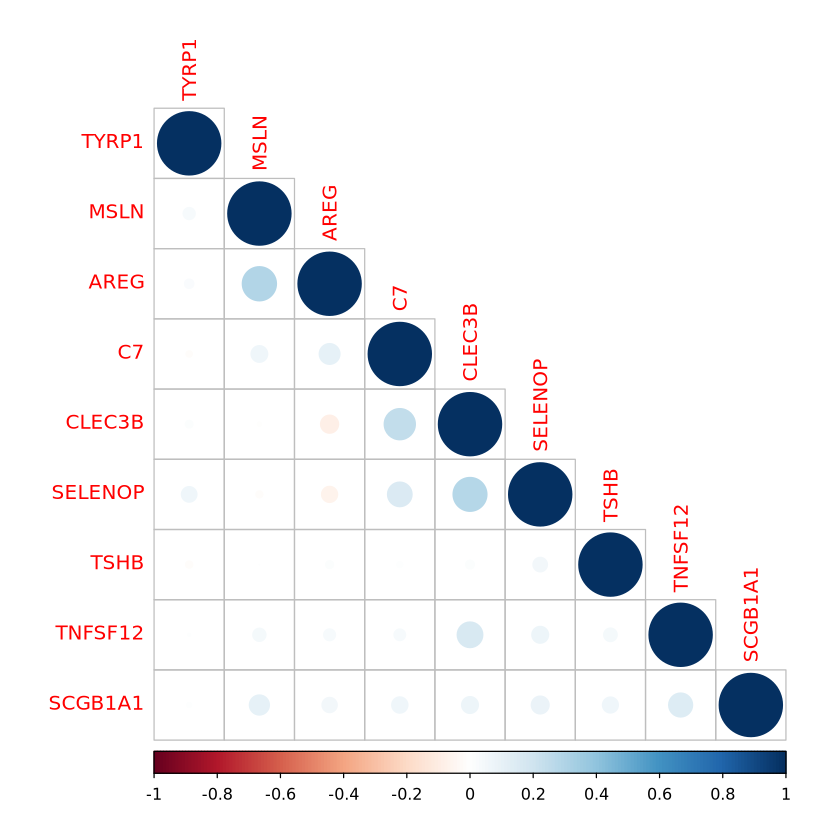

In [27]:
# correlation plot for selected proteins
corrplot(cor(train.min[,-c(1:4)]), type="lower", order='hclust', diag=T)

In [28]:
# fit log.regression model with stabsel selected predictors
formula.min <- as.formula(paste("delirium_incident ~ sex + age_at_collection + BMI ", paste(prots.min, collapse="+"), sep="+"))
formula.min
mod.min <- glm(formula = formula.min, data = train.min, family = "binomial")
summary(mod.min)

delirium_incident ~ sex + age_at_collection + BMI + CLEC3B + 
    MSLN + SELENOP + TNFSF12 + AREG + TSHB + TYRP1 + SCGB1A1 + 
    C7


Call:
glm(formula = formula.min, family = "binomial", data = train.min)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -14.75983    0.84322 -17.504  < 2e-16 ***
sex                 0.24529    0.12789   1.918 0.055116 .  
age_at_collection   0.13694    0.01201  11.404  < 2e-16 ***
BMI                 0.05345    0.01181   4.527 5.98e-06 ***
CLEC3B             -0.26680    0.06782  -3.934 8.35e-05 ***
MSLN                0.23619    0.06391   3.696 0.000219 ***
SELENOP            -0.19632    0.06276  -3.128 0.001759 ** 
TNFSF12            -0.15974    0.06242  -2.559 0.010500 *  
AREG                0.22711    0.06845   3.318 0.000907 ***
TSHB               -0.16863    0.06008  -2.807 0.005002 ** 
TYRP1               0.16302    0.06018   2.709 0.006755 ** 
SCGB1A1            -0.13753    0.05798  -2.372 0.017698 *  
C7                  0.27198    0.05826   4.668 3.04e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dis

*null model:*

In [29]:
# null model
formula.null <- as.formula("delirium_incident ~ sex + age_at_collection + BMI")
formula.null
mod.null <- glm(formula = formula.null, data = train.1se, family = "binomial")
summary(mod.null)
# export coefficients
write.csv(summary(mod.null)$coefficients, "../outputs_for_paper/nodem/train_null_model_coefs.csv", row.names=T)

delirium_incident ~ sex + age_at_collection + BMI


Call:
glm(formula = formula.null, family = "binomial", data = train.1se)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -15.47843    0.84068 -18.412  < 2e-16 ***
sex                 0.40193    0.12199   3.295 0.000985 ***
age_at_collection   0.14934    0.01185  12.601  < 2e-16 ***
BMI                 0.05810    0.01196   4.860 1.17e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3096.6  on 25690  degrees of freedom
Residual deviance: 2826.8  on 25687  degrees of freedom
AIC: 2834.8

Number of Fisher Scoring iterations: 8


*only-proteins model:*

In [30]:
# fit log.regression model only with stabsel selected predictors (no covariates)
formula.prot <- as.formula(paste("delirium_incident ~ ", paste(prots.1se, collapse="+"), sep=" "))
formula.prot
mod.prot <- glm(formula = formula.prot, data = train.1se, family = "binomial")
summary(mod.prot)
# export coefficients
write.csv(summary(mod.prot)$coefficients, "../outputs_for_paper/nodem/train_protonly_model_coefs.csv", row.names=T)

delirium_incident ~ GFAP + CLEC3B + C7 + AREG + LYSMD3 + CEND1 + 
    MEPE + TSHB + LRG1 + SELENOP + BCAN + NEFL + TYRP1 + NAMPT + 
    MSLN + BTLA + FGL1 + HAVCR1 + LTA4H


Call:
glm(formula = formula.prot, family = "binomial", data = train.1se)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.047822   0.085090 -59.323  < 2e-16 ***
GFAP         0.164251   0.065926   2.491 0.012723 *  
CLEC3B      -0.299447   0.067385  -4.444 8.84e-06 ***
C7           0.234352   0.061573   3.806 0.000141 ***
AREG         0.139562   0.067370   2.072 0.038306 *  
LYSMD3      -0.251727   0.061148  -4.117 3.84e-05 ***
CEND1        0.013964   0.062309   0.224 0.822674    
MEPE        -0.046551   0.059950  -0.776 0.437455    
TSHB        -0.120418   0.059967  -2.008 0.044636 *  
LRG1         0.125635   0.065077   1.931 0.053536 .  
SELENOP     -0.183841   0.063212  -2.908 0.003634 ** 
BCAN        -0.326889   0.065525  -4.989 6.08e-07 ***
NEFL         0.388061   0.066466   5.838 5.27e-09 ***
TYRP1        0.105685   0.060930   1.735 0.082826 .  
NAMPT        0.037282   0.062133   0.600 0.548479    
MSLN         0.151093   0.064630   2.338 0.0193

In [32]:
# select proteins with stepwise regression
mod.prot <- glm(formula = formula.prot, data = train.1se, family = "binomial")
step.prot <- step(mod.prot, direction = "both", trace=F) 
summary(step.prot)
# export coefficients
write.csv(summary(step.prot)$coefficients, "../outputs_for_paper/nodem/train_protonly_model_STEP_coefs.csv", row.names=T)


Call:
glm(formula = delirium_incident ~ GFAP + CLEC3B + C7 + AREG + 
    LYSMD3 + TSHB + LRG1 + SELENOP + BCAN + NEFL + TYRP1 + MSLN + 
    BTLA + HAVCR1 + LTA4H, family = "binomial", data = train.1se)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -5.04486    0.08487 -59.441  < 2e-16 ***
GFAP         0.16658    0.06558   2.540  0.01108 *  
CLEC3B      -0.30295    0.06696  -4.525 6.05e-06 ***
C7           0.23748    0.06103   3.891 9.97e-05 ***
AREG         0.13880    0.06693   2.074  0.03808 *  
LYSMD3      -0.24555    0.06064  -4.049 5.14e-05 ***
TSHB        -0.12033    0.05982  -2.012  0.04426 *  
LRG1         0.12837    0.05959   2.154  0.03122 *  
SELENOP     -0.18744    0.06310  -2.970  0.00298 ** 
BCAN        -0.33237    0.06479  -5.130 2.90e-07 ***
NEFL         0.38246    0.06578   5.815 6.08e-09 ***
TYRP1        0.10478    0.06091   1.720  0.08541 .  
MSLN         0.14955    0.06457   2.316  0.02056 *  
BTLA         0.14342    0.06036   2.376 

In [33]:
setdiff(prots.1se,names(step.apoe$coefficients)[6:length(names(step.apoe$coefficients))])
setdiff(prots.1se,names(step.1se$coefficients)[5:length(names(step.1se$coefficients))])
setdiff(prots.1se,names(step.prot$coefficients))


[1] "GFAP"  "CEND1" "MEPE"  "NAMPT" "FGL1"

[1] "GFAP"  "CEND1" "MEPE"  "NAMPT" "FGL1"

[1] "CEND1" "MEPE"  "NAMPT" "FGL1"

**Test dataset:**

In [121]:
## uncomment t1.min if you want model with LASSO min

# get probs at test set
probs.min  <- predict(mod.min, newdata = test_data_orig, type = "response")
#probs.apoe <- predict(mod.apoe, newdata = test_data_orig, type = "response")
probs.apoe <- predict(step.apoe, newdata = test_data_orig, type = "response")
probs.1se  <- predict(step.1se, newdata = test_data_orig, type = "response")
probs.null <- predict(mod.null, newdata = test_data_orig, type = "response")
probs.prot <- predict(step.prot, newdata = test_data_orig, type = "response")

# make table with: real response in test; probs; model type
#t1.min <- bind_cols(test_data_orig$delirium_incident, probs.min, rep("proteomic (stabsel.min) + basic",length(probs.min)))
t1 <- bind_cols(test_data_orig$delirium_incident, probs.apoe, rep("APOE + proteomic + basic",length(probs.apoe)))
t2 <- bind_cols(test_data_orig$delirium_incident, probs.1se, rep("proteomic + basic",length(probs.1se)))
t3 <- bind_cols(test_data_orig$delirium_incident, probs.null, rep("basic",length(probs.null)))
t4 <- bind_cols(test_data_orig$delirium_incident, probs.prot, rep("proteomic",length(probs.prot)))

# merge by cols 
probs.table <- bind_rows(t1,t2,t3,t4)
#probs.table <- bind_rows(t2,t3,t4)
names(probs.table) <- c("truth", "probs_cases", "model")
probs.table$truth  <- as.factor(probs.table$truth) # needs to be factor
# convert model column to factor + reorder levels (as they will appear in legend)
model_as_fct <- factor(probs.table$model, levels=levels(factor(probs.table$model))[c(1,4,2,3)])
#model_as_fct <- factor(probs.table$model, levels=levels(factor(probs.table$model))[c(2,1,3)])
probs.table$model <- model_as_fct

# cat("mean predicted case prob. for true status (stabsel.min model): ")
# probs.table %>% filter(model == "proteomic (stabsel.min) + basic") %>% group_by(truth) %>% summarise(mean_prob =mean(probs_cases))
# cat("mean predicted case prob. for true status (stbsel.1se model): ")
# probs.table %>% filter(model == "proteomic + basic") %>% group_by(truth) %>% summarise(mean_prob =mean(probs_cases))
# cat("mean predicted case prob. for true status (null model): ")
# probs.table %>% filter(model == "basic") %>% group_by(truth) %>% summarise(mean_prob =mean(probs_cases))
# cat("mean predicted case prob. for true status (protein model): ")
# probs.table %>% filter(model == "proteomic") %>% group_by(truth) %>% summarise(mean_prob =mean(probs_cases))


New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`


In [122]:
# ROC AUCs
aucs <- 
probs.table %>% 
    #filter(model!="proteomic (stabsel.min) + basic") %>% 
    group_by(model) %>% 
    roc_auc(., truth, probs_cases, event_level="second")
aucs

# labels for ROC plot
roc_labels <- c(paste0(
    levels(probs.table$model),
#    ": ",
#    "AUC=",
    " (",
    sprintf('%.3f',aucs$.estimate),
    ")"
))
roc_labels

model,.metric,.estimator,.estimate
<fct>,<chr>,<chr>,<dbl>
APOE + proteomic + basic,roc_auc,binary,0.7904564
proteomic + basic,roc_auc,binary,0.7906343
basic,roc_auc,binary,0.7577017
proteomic,roc_auc,binary,0.7712254


[1] "APOE + proteomic + basic (0.790)" "proteomic + basic (0.791)"        "basic (0.758)"                    "proteomic (0.771)"

In [123]:
# PRROC AUCs
praucs <- 
probs.table %>% 
    #filter(model!="proteomic (stabsel.min) + basic") %>% 
    group_by(model) %>% 
    pr_auc(., truth, probs_cases, event_level="second")
praucs

# labels for ROC plot
pr_labels <- c(paste0(
    levels(probs.table$model),
    " (",
    sprintf('%.3f', praucs$.estimate),
    ")"
))
pr_labels

model,.metric,.estimator,.estimate
<fct>,<chr>,<chr>,<dbl>
APOE + proteomic + basic,pr_auc,binary,0.03600747
proteomic + basic,pr_auc,binary,0.03628174
basic,pr_auc,binary,0.03324344
proteomic,pr_auc,binary,0.03394316


[1] "APOE + proteomic + basic (0.036)" "proteomic + basic (0.036)"        "basic (0.033)"                    "proteomic (0.034)"

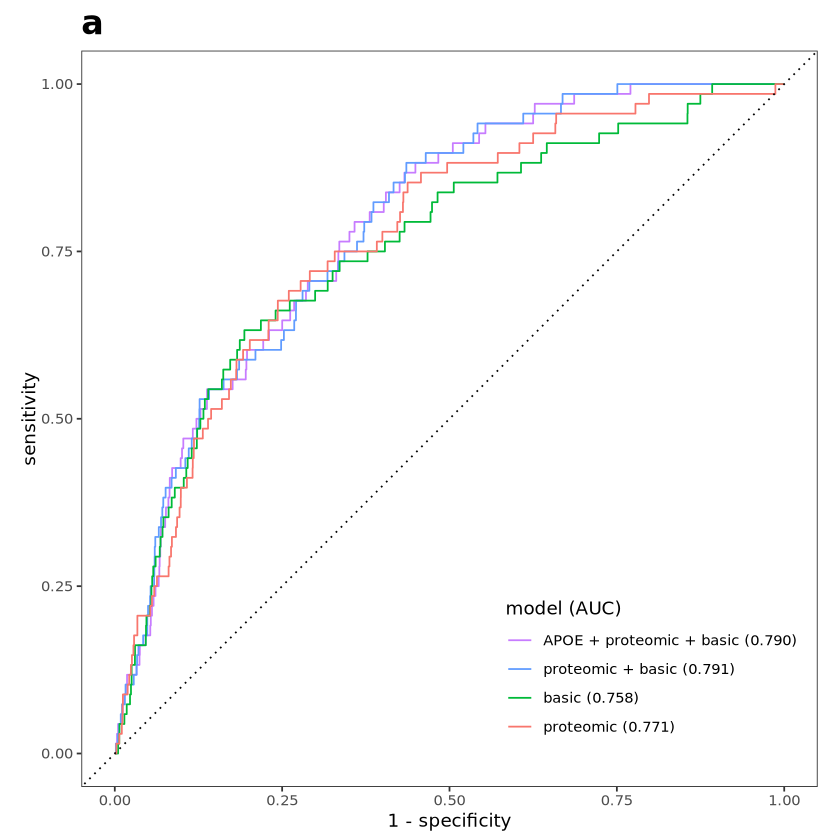

In [124]:
# plot roc curve
roc_plot_a <-
probs.table %>% 
    #filter(model!="proteomic (stabsel.min) + basic") %>% 
    group_by(model) %>% 
    roc_curve(., truth, probs_cases, event_level="second") %>% 
    autoplot() + 
    # plot title
    labs(title = "a") +
    # adjust legend inside the plot
    theme(legend.position = "inside", 
          legend.justification = c("right", "bottom"), 
          legend.position.inside = c(.95, .05)) + 
    # legend background
    theme(legend.background = element_rect(fill="white", size=0.2, linetype="solid", colour = NA)) + 
    # change color order
    #scale_color_manual(labels = roc_labels, values=c("#619CFF", "#00BA38", "#F8766D")) + 
    #scale_color_manual(labels = roc_labels, values=c("#C77CFF", "#619CFF", "#00BA38", "#F8766D")) + 
    scale_color_manual("model (AUC)", labels = roc_labels, values=c("#C77CFF", "#619CFF", "#00BA38", "#F8766D")) + 
    # remove grid lines
    theme(
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(face="bold", size = 20)
    ) 

roc_plot_a

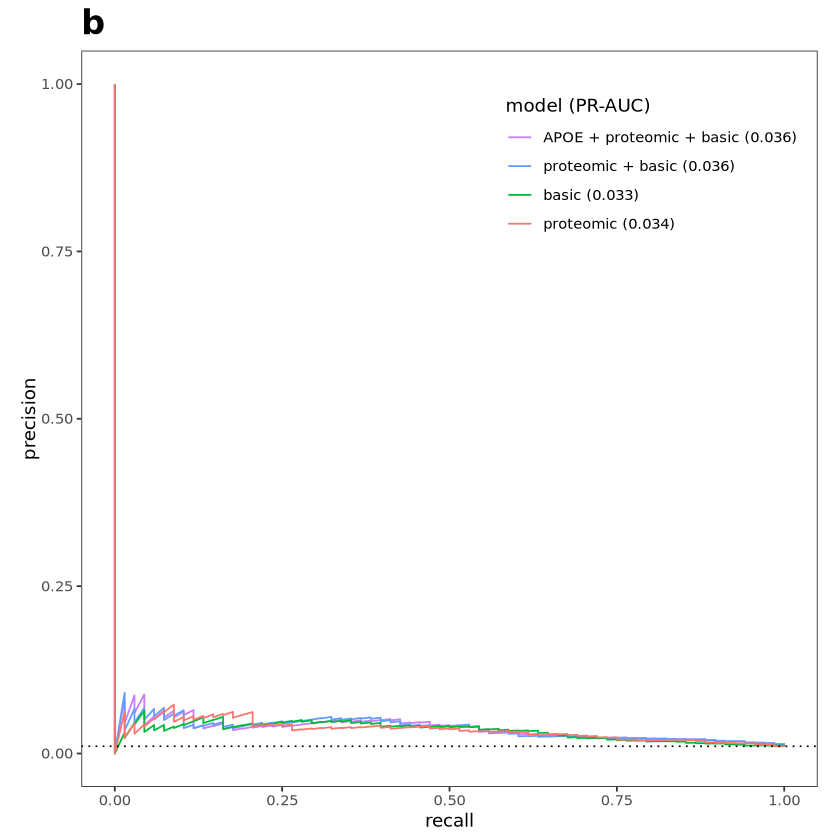

In [125]:
# plot pr curve
prev = test_data_orig$delirium_incident %>% table %>% .[2] / test_data_orig$delirium_incident %>% table %>% .[1]

pr_plot_b <-
probs.table %>% 
    #filter(model!="proteomic (stabsel.min) + basic") %>% 
    group_by(model) %>% 
    pr_curve(., truth, probs_cases, event_level="second") %>% 
    autoplot() + 
    # plot prevelance line
    geom_hline(yintercept = prev, linetype="dotted", color = "black") + 
    # plot title
    labs(title = "b") +
    # adjust legend inside the plot
    theme(legend.position = "inside", 
          legend.justification = c("right", "top"), 
          legend.position.inside = c(.95, .95)) + 
    # legend background
    #theme(legend.background = element_rect(fill="white", size=0.2, linetype="solid", colour ="black")) + 
    theme(legend.background = element_rect(fill="white", size=0.2, linetype="solid", colour = NA)) + 
    # change color order
    #scale_color_manual(labels = pr_labels, values=c("#619CFF", "#00BA38", "#F8766D")) + 
    scale_color_manual("model (PR-AUC)", labels = pr_labels, values=c("#C77CFF", "#619CFF", "#00BA38", "#F8766D")) + 
    # remove grid lines
    theme(
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        plot.title = element_text(face="bold", size = 20)) 
pr_plot_b


Saving 14 x 14 in image


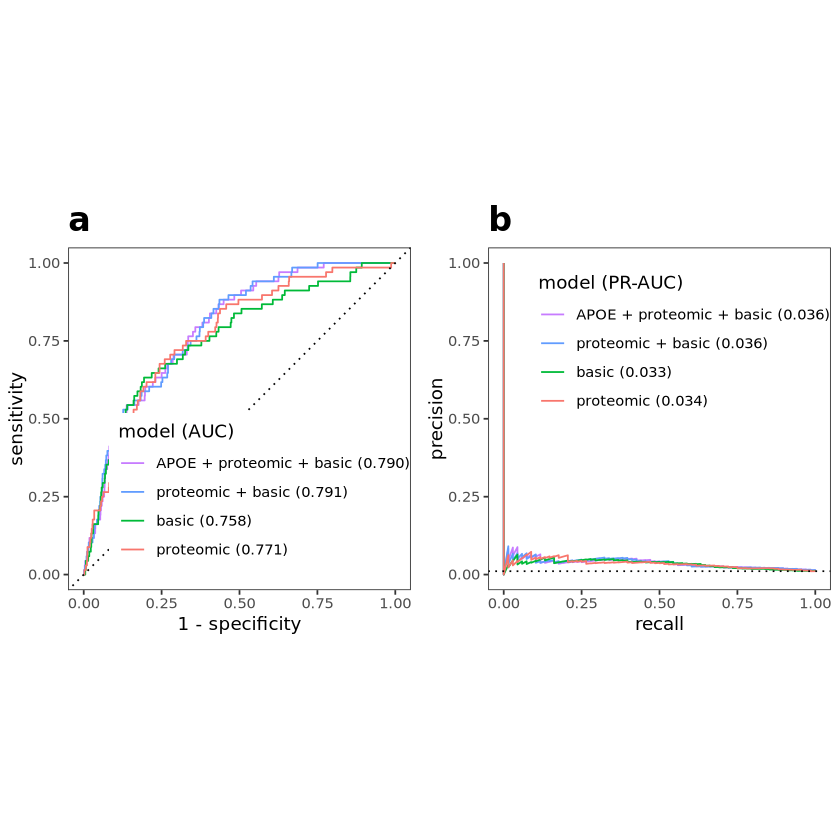

In [126]:
both <- ggarrange(roc_plot_a, pr_plot_b, ncol=2, nrow = 1)
both
ggsave("../outputs_for_paper/nodem/roc_pr_allmodels_plusAPOE.png", both, scale = 2, dpi=600)


In [36]:
prev = test_data_orig$delirium_incident %>% table %>% .[2] / test_data_orig$delirium_incident %>% table %>% .[1]
prev

1 
0.01082458

**Test auc difference:**

In [127]:
roc.apoe <- roc(test_data_orig$delirium_incident, probs.apoe)
roc.1se <- roc(test_data_orig$delirium_incident, probs.1se)
roc.basic <- roc(test_data_orig$delirium_incident, probs.null)
roc.prot <- roc(test_data_orig$delirium_incident, probs.prot)
#roc.min <- roc(test_data_orig$delirium_incident, probs.min)

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [128]:
print("Compare APOE+Protein+Basic VS basic:")
roc.test(roc.apoe, roc.basic)

[1] "Compare APOE+Protein+Basic VS basic:"



	DeLong's test for two correlated ROC curves

data:  roc.apoe and roc.basic
Z = 1.5339, p-value = 0.1251
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.009098251  0.074607549
sample estimates:
AUC of roc1 AUC of roc2 
  0.7904564   0.7577017 


In [129]:
print("Compare Protein+Basic VS basic:")
roc.test(roc.1se, roc.basic)

[1] "Compare Protein+Basic VS basic:"



	DeLong's test for two correlated ROC curves

data:  roc.1se and roc.basic
Z = 1.5579, p-value = 0.1193
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.008499955  0.074365079
sample estimates:
AUC of roc1 AUC of roc2 
  0.7906343   0.7577017 


In [134]:
print("Compare ProteinOnly VS basic:")
roc.test(roc.prot, roc.basic)

[1] "Compare ProteinOnly VS basic:"



	DeLong's test for two correlated ROC curves

data:  roc.prot and roc.basic
Z = 0.35522, p-value = 0.7224
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.06109457  0.08814197
sample estimates:
AUC of roc1 AUC of roc2 
  0.7712254   0.7577017 


In [135]:
print("Compare ProteinOnly VS Protein+Basic:")
roc.test(roc.prot, roc.1se)

[1] "Compare ProteinOnly VS Protein+Basic:"



	DeLong's test for two correlated ROC curves

data:  roc.prot and roc.1se
Z = -1.0197, p-value = 0.3079
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.05671454  0.01789681
sample estimates:
AUC of roc1 AUC of roc2 
  0.7712254   0.7906343 


In [136]:
print("Compare ProteinOnly VS APOE+Protein+Basic:")
roc.test(roc.prot, roc.apoe)

[1] "Compare ProteinOnly VS APOE+Protein+Basic:"



	DeLong's test for two correlated ROC curves

data:  roc.prot and roc.apoe
Z = -1.0038, p-value = 0.3155
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.05678138  0.01831948
sample estimates:
AUC of roc1 AUC of roc2 
  0.7712254   0.7904564 


In [137]:
print("Compare Protein+Basic VS APOE+Protein+Basic:")
roc.test(roc.1se, roc.apoe)

[1] "Compare Protein+Basic VS APOE+Protein+Basic:"



	DeLong's test for two correlated ROC curves

data:  roc.1se and roc.apoe
Z = 0.059923, p-value = 0.9522
alternative hypothesis: true difference in AUC is not equal to 0
95 percent confidence interval:
 -0.005641296  0.005997121
sample estimates:
AUC of roc1 AUC of roc2 
  0.7906343   0.7904564 
